In [151]:
import numpy as np
import matplotlib.pyplot as plt

__This code shows two different numerical analysis methods: Forward Euler and Runge-Kutta 4th Order (RK4)__

They are currently set up to solve the coupled EOMs for a spring pendulum. To mess with the code yourself feel free to change the variables and initial conditions.

If you want to try numerically solving your own coupled EOM feel free to find the labeled EOMs in this code and change them. Make sure you set up the appropriate variables needed for them. To see an example of solving a non-coupled EOM with RK4, see my bonus code at the bottom.

**To learn how these methods work check out these links:** <br /> <br />
Euler: https://math.libretexts.org/Bookshelves/Differential_Equations/Numerically_Solving_Ordinary_Differential_Equations_(Brorson)/01%3A_Chapters/1.02%3A_Forward_Euler_method#:~:text=The%20forward%20Euler%20method%20is,tn%2Cyn) <br /> <br />
RK4: https://lpsa.swarthmore.edu/NumInt/NumIntFourth.html <br /> <br />
Differences: https://scicomp.stackexchange.com/questions/20172/why-are-runge-kutta-and-eulers-method-so-different


**Setting up Variables and Initial Conditions** 

In [152]:
# Variables
l = 2 # m
m = 1.5 # kg
k = 100 # N/m

# constants
g = 9.81 # m/s^2

# ICs
theta_0 = 0.0 * np.pi # radians
dtheta_0 = 0.0 * np.pi # radians/s
x_0 = 0.2 # m
dx_0 = 0 # m/s

n = 1000  # number of values in interval.
t_max = 10 # maximum value of interval. Tweak to stop function from blowing up
h = t_max / n # the smaller h is, the more time the code will take to run


**Numerically solving with the Forward Euler's Method**

In [153]:
# setting up arrays full of 0's to replace with values as we iterate through Euler
t = np.zeros(n + 1) # time
theta = np.zeros(n + 1)
thetadot = np.zeros(n + 1)
thetaddot = np.zeros(n + 1)
x = np.zeros(n + 1)
xdot = np.zeros(n + 1)
xddot = np.zeros(n + 1)

# setting the first element to the initial conditions
t[0] = 0
theta[0] = theta_0
thetadot[0] = dtheta_0
x[0] = x_0
xdot[0] = dx_0

# 2nd order forward Euler
for i in range(n):
    t[i + 1] = t[i] + h
    theta[i + 1] = theta[i] + h * thetadot[i]
    thetadot[i + 1] = thetadot[i] + h * thetaddot[i]
    x[i + 1] = x[i] + h * xdot[i]
    xdot[i + 1] = xdot[i] + h * xddot[i]
    thetaddot[i+1] = (-2*xdot[i+1]*thetadot[i+1])/(l+x[i+1]) - g/(l+x[i+1])*np.sin(theta[i+1]) # theta EOM
    xddot[i+1] = (l+x[i+1])*thetadot[i+1]**2 + g*np.cos(theta[i+1]) - (k/m)*x[i+1] # position EOM
    
# divding theta array by pi
theta = theta/np.pi

**Plotting Result**

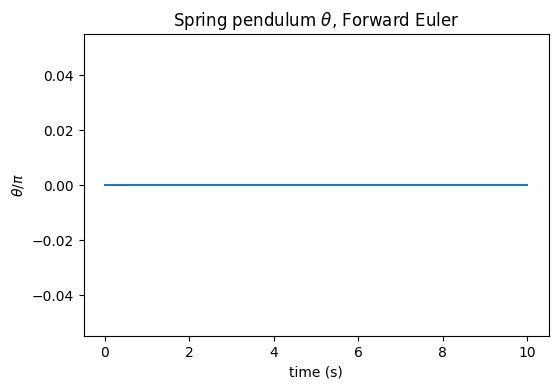

In [154]:
# plotting result for theta
fig = plt.figure(dpi=100)
plt.plot(t, theta)
fig.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel(r"$\theta/\pi$")
plt.title(r"Spring pendulum $\theta$, Forward Euler")
plt.show()

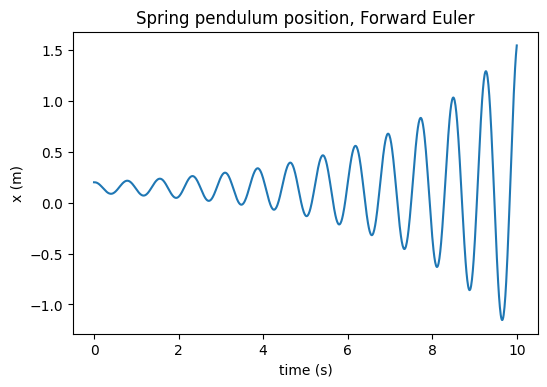

In [155]:
# plotting result for position
fig2 = plt.figure(dpi=100)
plt.plot(t, x)
fig2.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel("x (m)")
plt.title("Spring pendulum position, Forward Euler")
plt.show()

Try these IC's:

theta_0 = 0, dtheta_0 = 0, x_0 = 0.2, dx_0 = 0, n = 1000, t_max = 10

Due to the only non-zero IC being a displacement in the equalibrium position this is just an oscillating spring. As expected, the angle does not change but there is a very odd increasing amplitude for each period of the position. Did we just create energy? No! This is a perfect example of why choosing a numerical method carefully matters. The way forward Euler accumulates error causes it be very inaccurate for oscillating systems and our function would explode if we ran the simulation for a longer time.

**Runge-Kutta 4th order method**

In [156]:
# time = np.arange(0.0, t_max, h)
# θ = np.zeros(n + 1)
# x = np.zeros(n + 1)
# dθ = np.zeros(n + 1)
# dx = np.zeros(n + 1)

# def G_x(pos, dpos, th, dth): 
# 	x_d, θ_d, x, θ = pos, dpos, th, dth

# 	x_dd = (l+x) * θ_d**2 - k/m*x + g*np.cos(θ)

# 	return np.array([x_dd, x_d])

# def G_θ(pos, dpos, th, dth): 
# 	x_d, θ_d, x, θ = pos, dpos, th, dth

# 	θ_dd = -2.0/(l+x) * x_d * θ_d - g/(l+x) * np.sin(θ)

# 	return np.array([θ_dd, θ_d])

# def RK4_step_θ(y, t, dt):
# 	k1 = G_θ(y,t)
# 	k2 = G_θ(y+0.5*k1*dt, t+0.5*dt)
# 	k3 = G_θ(y+0.5*k2*dt, t+0.5*dt)
# 	k4 = G_θ(y+k3*dt, t+dt)

# 	return dt * (k1 + 2*k2 + 2*k3 + k4) / 6

# def RK4_step_x(y, t, dt):
# 	k1 = G_x(y,t)
# 	k2 = G_x(y+0.5*k1*dt, t+0.5*dt)
# 	k3 = G_x(y+0.5*k2*dt, t+0.5*dt)
# 	k4 = G_x(y+k3*dt, t+dt)

# 	return dt * (k1 + 2*k2 + 2*k3 + k4) / 6

# # time-stepping solution
# for i, time in enumerate(t):

# 	θ[i+1] = θ[i] + RK4_step_θ(θ[i], dθ[i], x[i], dx[i])[1]
# 	dθ[i+1] = dθ[i] +RK4_step_θ(θ[i], dθ[i], x[i], dx[i])[2]
# 	x[i+1] = x[i] + RK4_step_x(θ[i], dθ[i], x[i], dx[i])

In [157]:
time = np.arange(0.0, t_max, h)

def G(y,t): 
	x_d, θ_d, x, θ = y[0], y[1], y[2], y[3]

	x_dd = (l+x) * θ_d**2 - k/m*x + g*np.cos(θ) # position EOM
	θ_dd = -2.0/(l+x) * x_d * θ_d - g/(l+x) * np.sin(θ) # theta EOM

	return np.array([x_dd, θ_dd, x_d, θ_d])

# solving for next y-value by finding and weighing the k constants
def RK4_step(y, t, dt):
	k1 = G(y,t)
	k2 = G(y+0.5*k1*dt, t+0.5*dt)
	k3 = G(y+0.5*k2*dt, t+0.5*dt)
	k4 = G(y+k3*dt, t+dt)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

time = np.arange(0.0, t_max, h)

# initial state
y = np.array([dx_0, dtheta_0, x_0 , theta_0])   # [velocity, displacement]

x = np.array([])
θ = np.array([])

# time-stepping solution
for t in time:
	y = y + RK4_step(y, t, h) 

	x = np.append(x, y[2])
	θ = np.append(θ, y[3])

θ = θ /np.pi

**Plotting Result**

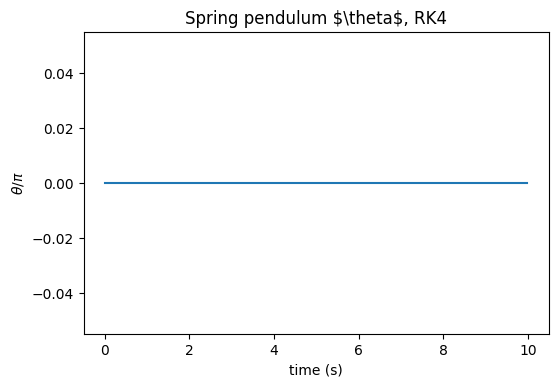

In [158]:
# plotting result for angle
fig3 = plt.figure(dpi=100)
plt.plot(time, θ)
fig.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel(r"$\theta/\pi$")
plt.title(r"Spring pendulum $\theta\$, RK4")
plt.show()

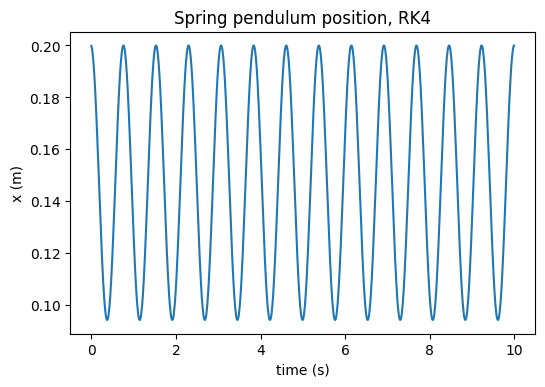

In [159]:
# plotting result for position
fig4 = plt.figure(dpi=100)
plt.plot(time, x)
fig.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel("x (m)")
plt.title(r"Spring pendulum position, RK4")
plt.show()

For the same IC's described above we now see a result which is what we expect. The way RK4 takes into account multiple points and does a weighted average makes its prediction for an oscillating system much more accurate and yeilds a very high convergence. RK4 tends to be one of the most popular choices for numerical methods due to its balance of accuracy and computation time.


Mess with the ICs more and see how the results change. Sometimes Euler might give the same result as RK4 and lots of the time it'll show again how bad it is for this application.

**BONUS: Driven Damped Pendulum**

Because I can, I have also numerically solved the EOM for a driven damped pendulum (Using RK4 of course). Feel free to mess with the gamma value and the rest of the parameter to get some chaotic motion. The power of making flexible code is that it only took a few minutes to take the code from above and make it work for a completly different problem.

In [160]:
# Driven damped pendulum with RK4

# variables
gam = 1.0662
w = 1 # rad/s
b = 0.75/2
w_0 = 1.5

time = np.arange(0.0, t_max, h)

def G(y,t): 
	θ_d, θ = y[0], y[1]

	θ_dd = gam*w_0**2*np.cos(w*t) - 2*b*θ_d - w_0**2*np.sin(θ) # angle EOM

	return np.array([θ_dd, θ_d])

def RK4_step(y, t, dt):
	k1 = G(y,t)
	k2 = G(y+0.5*k1*dt, t+0.5*dt)
	k3 = G(y+0.5*k2*dt, t+0.5*dt)
	k4 = G(y+k3*dt, t+dt)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

time = np.arange(0.0, t_max, h)

# initial state
y = np.array([dtheta_0, theta_0])   # [velocity, displacement]

θ = np.array([])

# time-stepping solution
for t in time:
	y = y + RK4_step(y, t, h) 

	θ = np.append(θ, y[1])

θ = θ /np.pi


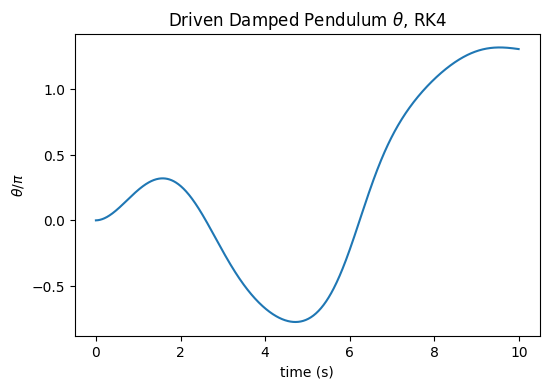

In [161]:
# plotting result for angle
fig5 = plt.figure(dpi=100)
plt.plot(time, θ)
fig.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel(r"$\theta/\pi$")
plt.title(r"Driven Damped Pendulum $\theta$, RK4")
plt.show()